### Python ile Airbnb Verisini Haritalama

http://insideairbnb.com/get-the-data.html adresinden Istanbul veri seti listing.csv indirilecek.


In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt

In [3]:
evler = pd.read_csv('./data/listings.csv')

In [4]:
type(evler)

pandas.core.frame.DataFrame

In [5]:
evler.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
evler.longitude

0        29.05367
1        29.04545
2        28.98153
3        28.98567
4        29.05559
5        28.95254
6        29.04684
7        28.97626
8        28.99739
9        28.97588
10       28.97213
11       28.99829
12       28.97718
13       28.97958
14       29.03580
15       28.98902
16       29.03155
17       28.96325
18       28.97858
19       28.98189
20       28.98002
21       28.98561
22       28.99090
23       28.99057
24       28.98873
25       28.99015
26       28.98961
27       28.97876
28       28.97404
29       28.98053
           ...   
23455    29.04691
23456    28.80821
23457    28.98385
23458    28.98394
23459    28.98424
23460    28.98412
23461    28.98286
23462    29.12976
23463    28.98791
23464    29.03031
23465    29.04601
23466    29.12729
23467    29.03512
23468    29.03950
23469    28.97355
23470    29.12810
23471    29.12929
23472    29.12945
23473    29.12862
23474    28.98140
23475    29.03294
23476    29.05393
23477    29.08281
23478    29.07909
23479    2

In [20]:
evler['geometry'] = evler[['longitude', 'latitude']].apply(shp.Point, axis=1)

In [21]:
evler

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,713,1,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650)
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,808,365,41,2018-11-07,0.33,2,254,POINT (29.04545 41.06984)
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,225,20,13,2018-05-04,0.19,1,363,POINT (28.98153 41.03254)
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,737,3,0,NaN,NaN,19,365,POINT (28.98567 41.04471)
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,815,3,0,NaN,NaN,1,88,POINT (29.05559 41.09048)
5,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04844,28.95254,Private room,339,3,0,NaN,NaN,1,365,POINT (28.95254 41.04844)
6,29692,bedroom with private shower and wc,127953,Aylin,NaN,Sariyer,41.13536,29.04684,Private room,414,1,0,NaN,NaN,1,365,POINT (29.04684 41.13536)
7,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,744,1,1,2010-06-14,0.01,1,365,POINT (28.97626 41.03350)
8,33368,Deluxe double bedroom @ Nisantasi,135136,Ozlem,NaN,Sisli,41.05382,28.99739,Private room,373,2,1,2014-10-21,0.01,2,364,POINT (28.99739 41.05382)
9,34925,A room in galata beyoglu,150435,Esr,NaN,Beyoglu,41.02704,28.97588,Private room,471,1,0,NaN,NaN,1,365,POINT (28.97588 41.02704)


In [22]:
evler = gpd.GeoDataFrame(evler)

In [23]:
type(evler)

geopandas.geodataframe.GeoDataFrame

In [26]:
evler.crs

In [27]:
evler.crs = {'init':'epsg:4329'}

C:\Users\uzayuzal\Anaconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [28]:
evler.crs

<Geographic 2D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World (by country)
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
evler.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,713,1,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650)
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,808,365,41,2018-11-07,0.33,2,254,POINT (29.04545 41.06984)
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,225,20,13,2018-05-04,0.19,1,363,POINT (28.98153 41.03254)
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,737,3,0,NaN,NaN,19,365,POINT (28.98567 41.04471)
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,815,3,0,NaN,NaN,1,88,POINT (29.05559 41.09048)


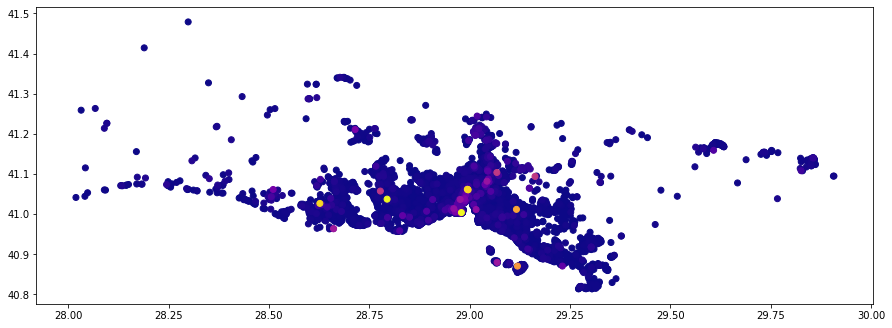

In [30]:
evler.sort_values('price').plot('price', cmap='plasma', figsize=(15,15))

In [32]:
ist_ilce = gpd.read_file('data/ist_neighbourhoods.geojson')

In [35]:
ist_ilce.head()

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."


In [36]:
ist_ilce.head(40)

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [38]:
evler2 = evler.dropna(subset=['name'])

In [39]:
evler2.loc[evler2['name'].str.contains('metrobüs')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
3166,8687718,Kadikoy’de metrobüse 1 dakika uzaklıkta residance,45616080,Eylül,NaN,Kadikoy,40.99019,29.04399,Entire home/apt,163,1,9,2020-03-08,1.02,1,364,POINT (29.04399 40.99019)
4814,15352408,Ferah aydınlık he huzurlu metro ve metrobüse 2...,72694624,Ramazan,NaN,Bahcelievler,40.99292,28.84688,Private room,210,3,2,2019-10-10,0.11,1,364,POINT (28.84688 40.99292)
5864,20784335,haramidere metrobüs /opposite haramidere metrobus,84972136,Bahadir,NaN,Beylikduzu,41.00185,28.67136,Private room,102,1,2,2018-09-23,0.06,1,365,POINT (28.67136 41.00185)
6234,22055291,Cevizlibağ metrobüs tramvay yanı lüks rezidans,161089311,Mert,NaN,Zeytinburnu,41.01756,28.90858,Private room,344,1,0,NaN,NaN,1,0,POINT (28.90858 41.01756)
7890,27284266,İstanbul Mecidiyeköy merkeze metroya metrobüse...,81861161,Çağatay,NaN,Sisli,41.07007,28.99675,Private room,5621,1,0,NaN,NaN,1,0,POINT (28.99675 41.07007)
8124,27759251,Beylikdüzü hadimköy metrobüs duragina yakin,209586017,Gülay,NaN,Esenyurt,41.02302,28.63611,Entire home/apt,68,2,14,2020-01-23,0.66,2,365,POINT (28.63611 41.02302)
8135,27771225,"yanyana sıralı bina ,denize 2 km , metrobüs yanı",209680493,Selma,NaN,Bahcelievler,40.99515,28.83615,Private room,68,1,1,2019-10-02,0.13,1,263,POINT (28.83615 40.99515)
8707,28728456,Cadde üzerinde metrobüse 2.dk yürüme mesafesinde,216695667,Şule,NaN,Uskudar,41.01417,29.05751,Private room,102,1,0,NaN,NaN,1,364,POINT (29.05751 41.01417)
9345,29848520,"Geniş ve balkonlu rahat,metrobüse sıfır, klimalı.",224485280,Ömer,NaN,Kagithane,41.06461,28.96878,Private room,149,1,0,NaN,NaN,1,364,POINT (28.96878 41.06461)
9381,29911367,"Metro, otobüs, metrobüs, dolmuş, 1 dakika merk...",223988779,Gul,NaN,Bahcelievler,40.99276,28.84690,Private room,339,1,0,NaN,NaN,2,179,POINT (28.84690 40.99276)


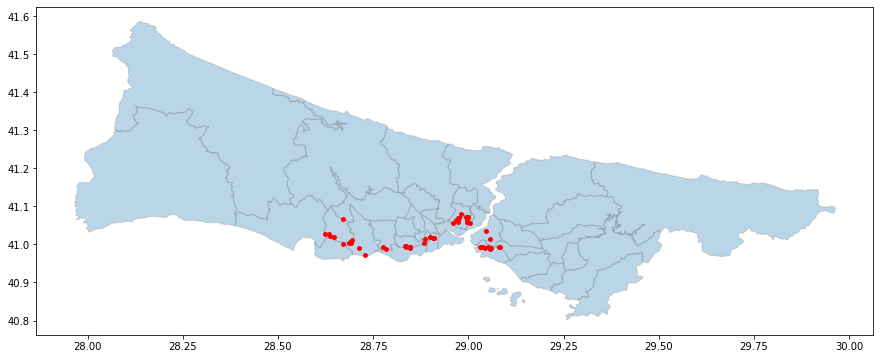

In [42]:
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('metrobüs')].plot(ax=ax, color='red', marker='o', markersize= 15)

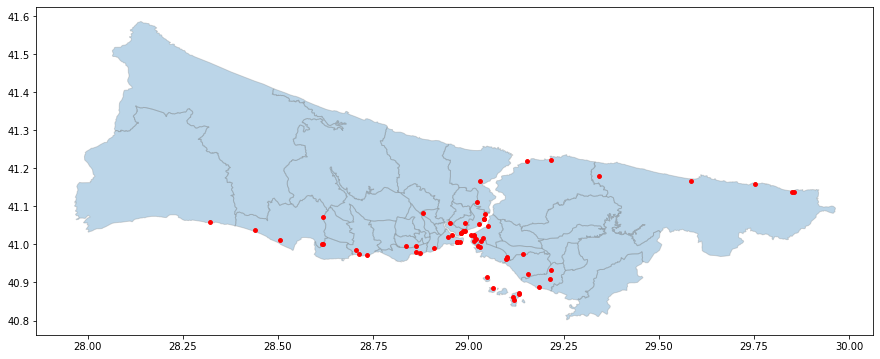

In [43]:
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('deniz')].plot(ax=ax, color='red', marker='o', markersize= 15)

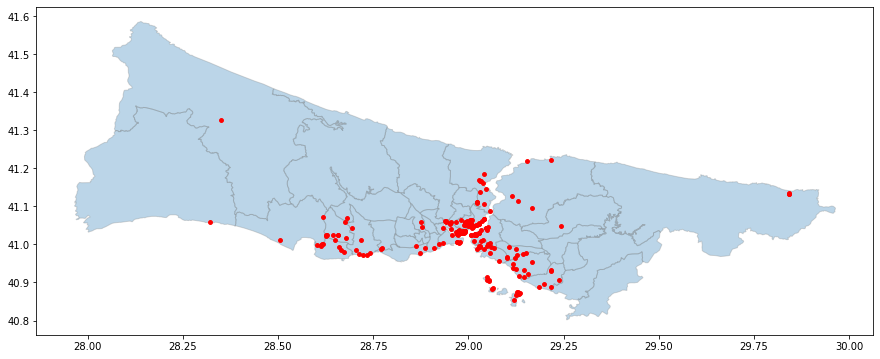

In [44]:
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('manzara')].plot(ax=ax, color='red', marker='o', markersize= 15)

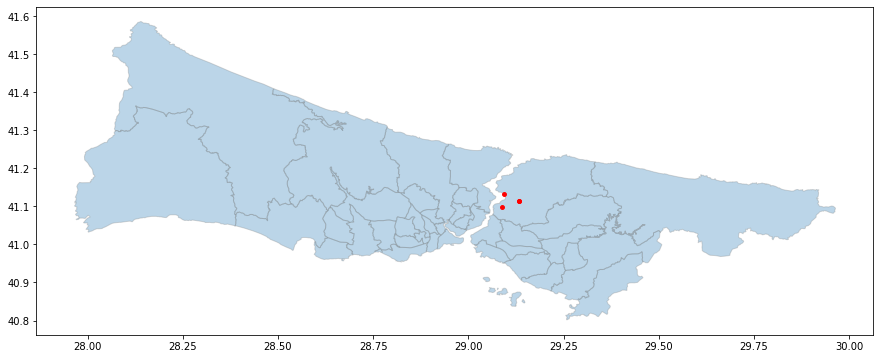

In [47]:
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('beykoz')].plot(ax=ax, color='red', marker='o', markersize= 15)

In [48]:
birlestirilmis = gpd.sjoin(evler2, ist_ilce, op='within', how='left')

C:\Users\uzayuzal\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4329 +type=crs != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [49]:
birlestirilmis.head(19)

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,713,1,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650),26.0,Uskudar,None
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,808,365,41,2018-11-07,0.33,2,254,POINT (29.04545 41.06984),23.0,Besiktas,None
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,225,20,13,2018-05-04,0.19,1,363,POINT (28.98153 41.03254),22.0,Beyoglu,None
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,737,3,0,NaN,NaN,19,365,POINT (28.98567 41.04471),25.0,Sisli,None
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,815,3,0,NaN,NaN,1,88,POINT (29.05559 41.09048),3.0,Sariyer,None
5,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04844,28.95254,Private room,339,3,0,NaN,NaN,1,365,POINT (28.95254 41.04844),22.0,Beyoglu,None
6,29692,bedroom with private shower and wc,127953,Aylin,NaN,Sariyer,41.13536,29.04684,Private room,414,1,0,NaN,NaN,1,365,POINT (29.04684 41.13536),3.0,Sariyer,None
7,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,744,1,1,2010-06-14,0.01,1,365,POINT (28.97626 41.03350),22.0,Beyoglu,None
8,33368,Deluxe double bedroom @ Nisantasi,135136,Ozlem,NaN,Sisli,41.05382,28.99739,Private room,373,2,1,2014-10-21,0.01,2,364,POINT (28.99739 41.05382),25.0,Sisli,None
9,34925,A room in galata beyoglu,150435,Esr,NaN,Beyoglu,41.02704,28.97588,Private room,471,1,0,NaN,NaN,1,365,POINT (28.97588 41.02704),22.0,Beyoglu,None


In [51]:
hesap_ort = birlestirilmis.groupby(['neighbourhood_right']).mean()

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right
neighbourhood_right,,,,,,,,,,,,
Adalar,2.455162e+07,1.081467e+08,NaN,40.874316,29.111430,968.451429,5.182857,7.994286,0.607168,2.531429,237.805714,37.0
Arnavutkoy,3.946766e+07,2.268399e+08,NaN,41.229240,28.702919,802.761194,1.388060,5.447761,1.876786,2.447761,214.029851,4.0
Atasehir,3.351442e+07,1.848022e+08,NaN,40.986051,29.112003,319.171625,4.237986,3.178490,0.640343,6.359268,250.782609,30.0
Avcilar,3.369492e+07,2.079865e+08,NaN,40.998555,28.717604,252.000000,3.653659,1.463415,0.430000,2.165854,220.756098,10.0
Bagcilar,3.511690e+07,2.223080e+08,NaN,41.042579,28.826324,364.562874,9.239521,1.353293,0.644255,6.065868,228.401198,15.0
Bahcelievler,3.001579e+07,1.802886e+08,NaN,41.000883,28.842405,316.473684,4.903509,2.807018,0.452809,2.438596,211.692982,11.0
Bakirkoy,2.999126e+07,1.594947e+08,NaN,40.980245,28.857459,376.446309,3.892617,3.298658,0.499304,4.070470,231.630872,12.0
Basaksehir,3.332680e+07,1.958130e+08,NaN,41.089417,28.760081,542.432727,8.534545,1.214545,0.357843,4.625455,228.010909,14.0
Bayrampasa,3.444514e+07,2.154720e+08,NaN,41.050172,28.899557,481.457143,1.885714,1.400000,0.250000,11.228571,176.028571,19.0


In [53]:
birles_ort = birlestirilmis.groupby(['neighbourhood_right']).mean().sort_values('price', ascending=False)

In [54]:
birles_ort

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right
neighbourhood_right,,,,,,,,,,,,
Beykoz,2.950608e+07,1.473833e+08,NaN,41.108784,29.127770,1574.776000,2.616000,1.808000,0.366098,4.176000,211.904000,27.0
Buyukcekmece,3.198348e+07,1.873044e+08,NaN,41.024294,28.554461,1028.046512,6.666667,0.891473,0.252857,5.333333,260.682171,7.0
Adalar,2.455162e+07,1.081467e+08,NaN,40.874316,29.111430,968.451429,5.182857,7.994286,0.607168,2.531429,237.805714,37.0
Sariyer,2.754504e+07,1.237189e+08,NaN,41.137328,29.042434,912.686813,5.708791,2.076923,0.388239,3.969780,211.961538,3.0
Kucukcekmece,3.261601e+07,1.946431e+08,NaN,41.019212,28.782553,870.666667,4.307292,1.406250,0.400577,6.052083,199.479167,13.0
Silivri,3.079082e+07,1.659674e+08,NaN,41.090684,28.230358,861.384615,4.884615,0.576923,0.203846,1.903846,184.038462,5.0
Arnavutkoy,3.946766e+07,2.268399e+08,NaN,41.229240,28.702919,802.761194,1.388060,5.447761,1.876786,2.447761,214.029851,4.0
Catalca,2.709666e+07,1.640969e+08,NaN,41.234942,28.429998,795.000000,3.000000,0.555556,0.220000,1.333333,236.111111,1.0
Sile,3.092388e+07,1.453251e+08,NaN,41.148386,29.718486,664.857143,3.680272,4.408163,0.557222,3.142857,269.659864,0.0


In [67]:
birlestirilmis['toplam']  =1

In [68]:
birlestirilmis

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,index_right,neighbourhood_right,neighbourhood_group_right,toplam
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,713,...,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650),26.0,Uskudar,None,1
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,808,...,41,2018-11-07,0.33,2,254,POINT (29.04545 41.06984),23.0,Besiktas,None,1
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,225,...,13,2018-05-04,0.19,1,363,POINT (28.98153 41.03254),22.0,Beyoglu,None,1
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,737,...,0,NaN,NaN,19,365,POINT (28.98567 41.04471),25.0,Sisli,None,1
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,815,...,0,NaN,NaN,1,88,POINT (29.05559 41.09048),3.0,Sariyer,None,1
5,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04844,28.95254,Private room,339,...,0,NaN,NaN,1,365,POINT (28.95254 41.04844),22.0,Beyoglu,None,1
6,29692,bedroom with private shower and wc,127953,Aylin,NaN,Sariyer,41.13536,29.04684,Private room,414,...,0,NaN,NaN,1,365,POINT (29.04684 41.13536),3.0,Sariyer,None,1
7,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,744,...,1,2010-06-14,0.01,1,365,POINT (28.97626 41.03350),22.0,Beyoglu,None,1
8,33368,Deluxe double bedroom @ Nisantasi,135136,Ozlem,NaN,Sisli,41.05382,28.99739,Private room,373,...,1,2014-10-21,0.01,2,364,POINT (28.99739 41.05382),25.0,Sisli,None,1
9,34925,A room in galata beyoglu,150435,Esr,NaN,Beyoglu,41.02704,28.97588,Private room,471,...,0,NaN,NaN,1,365,POINT (28.97588 41.02704),22.0,Beyoglu,None,1


In [69]:
toplamlar = birlestirilmis.groupby(['neighbourhood_right']).count()['toplam']

In [70]:
toplamlar

neighbourhood_right
Adalar            175
Arnavutkoy         67
Atasehir          437
Avcilar           205
Bagcilar          167
Bahcelievler      228
Bakirkoy          298
Basaksehir        275
Bayrampasa         35
Besiktas         1745
Beykoz            125
Beylikduzu        121
Beyoglu          6299
Buyukcekmece      129
Catalca            18
Cekmekoy           55
Esenler            25
Esenyurt          645
Eyup              236
Fatih            2938
Gaziosmanpasa      84
Gungoren           71
Kadikoy          2293
Kagithane         644
Kartal            207
Kucukcekmece      192
Maltepe           377
Pendik            203
Sancaktepe         52
Sariyer           364
Sile              147
Silivri            52
Sisli            3257
Sultanbeyli        22
Sultangazi         24
Tuzla              94
Umraniye          222
Uskudar           788
Zeytinburnu       113
Name: toplam, dtype: int64

Text(0.5, 1.0, 'İlçelerdeki Airbnb Daire Sayıları')

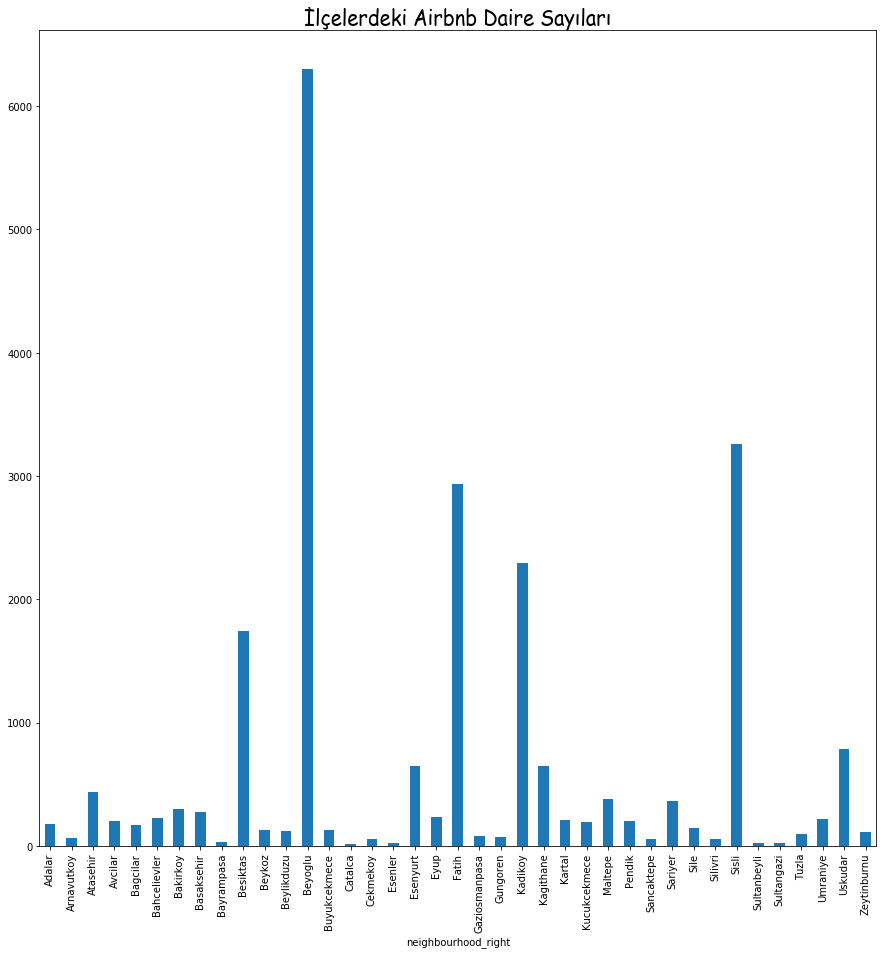

In [73]:
toplamlar.plot(kind='bar', figsize=(15,15))
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})


In [74]:
type(toplamlar)

pandas.core.series.Series

In [75]:
toplamlar2 = toplamlar.to_frame()

In [76]:
toplamlar2

,toplam
neighbourhood_right,
Adalar,175
Arnavutkoy,67
Atasehir,437
Avcilar,205
Bagcilar,167
Bahcelievler,228
Bakirkoy,298
Basaksehir,275
Bayrampasa,35


In [77]:
birles_ort

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right,toplam
neighbourhood_right,,,,,,,,,,,,,
Beykoz,2.950608e+07,1.473833e+08,NaN,41.108784,29.127770,1574.776000,2.616000,1.808000,0.366098,4.176000,211.904000,27.0,1
Buyukcekmece,3.198348e+07,1.873044e+08,NaN,41.024294,28.554461,1028.046512,6.666667,0.891473,0.252857,5.333333,260.682171,7.0,1
Adalar,2.455162e+07,1.081467e+08,NaN,40.874316,29.111430,968.451429,5.182857,7.994286,0.607168,2.531429,237.805714,37.0,1
Sariyer,2.754504e+07,1.237189e+08,NaN,41.137328,29.042434,912.686813,5.708791,2.076923,0.388239,3.969780,211.961538,3.0,1
Kucukcekmece,3.261601e+07,1.946431e+08,NaN,41.019212,28.782553,870.666667,4.307292,1.406250,0.400577,6.052083,199.479167,13.0,1
Silivri,3.079082e+07,1.659674e+08,NaN,41.090684,28.230358,861.384615,4.884615,0.576923,0.203846,1.903846,184.038462,5.0,1
Arnavutkoy,3.946766e+07,2.268399e+08,NaN,41.229240,28.702919,802.761194,1.388060,5.447761,1.876786,2.447761,214.029851,4.0,1
Catalca,2.709666e+07,1.640969e+08,NaN,41.234942,28.429998,795.000000,3.000000,0.555556,0.220000,1.333333,236.111111,1.0,1
Sile,3.092388e+07,1.453251e+08,NaN,41.148386,29.718486,664.857143,3.680272,4.408163,0.557222,3.142857,269.659864,0.0,1


In [78]:
ist_ilce

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [85]:
ist_ilce_birles = ist_ilce.merge(birles_ort, left_on='neighbourhood', right_on='neighbourhood_right')

In [80]:
ist_ilce_birles.head()

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right,toplam
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",3.092388e+07,1.453251e+08,NaN,41.148386,29.718486,664.857143,3.680272,4.408163,0.557222,3.142857,269.659864,0.0,1
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",2.709666e+07,1.640969e+08,NaN,41.234942,28.429998,795.000000,3.000000,0.555556,0.220000,1.333333,236.111111,1.0,1
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",3.154204e+07,1.678473e+08,NaN,41.099640,28.925797,344.800847,10.555085,2.262712,0.502125,1.957627,213.330508,2.0,1
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",2.754504e+07,1.237189e+08,NaN,41.137328,29.042434,912.686813,5.708791,2.076923,0.388239,3.969780,211.961538,3.0,1
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",3.946766e+07,2.268399e+08,NaN,41.229240,28.702919,802.761194,1.388060,5.447761,1.876786,2.447761,214.029851,4.0,1


In [81]:
ist_ilce_birles = ist_ilce.merge(toplamlar2, left_on='neighbourhood', right_on='neighbourhood_right')

In [82]:
ist_ilce_birles.head()

,neighbourhood,neighbourhood_group,geometry,toplam
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",147
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",18
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",236
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",364
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",67


In [83]:
ist_ilce_birles.to_file("outputs/ist_ilce_birles.geojson", driver='GeoJSON')


## Gorsellestirme

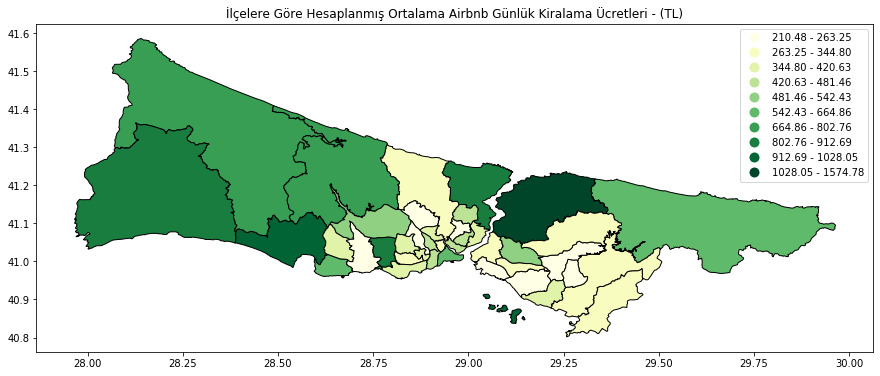

In [89]:
ax = ist_ilce_birles.plot(figsize=(15,15), column='price', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)



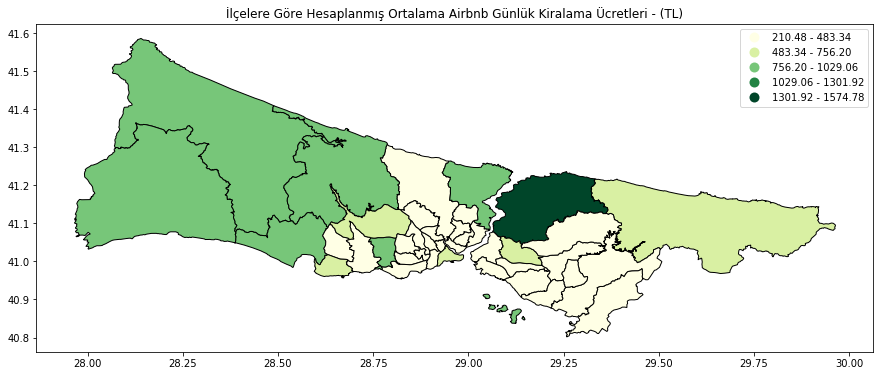

In [90]:
ax = ist_ilce_birles.plot(figsize=(15,15), column='price', scheme='equal_interval', k=5, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)


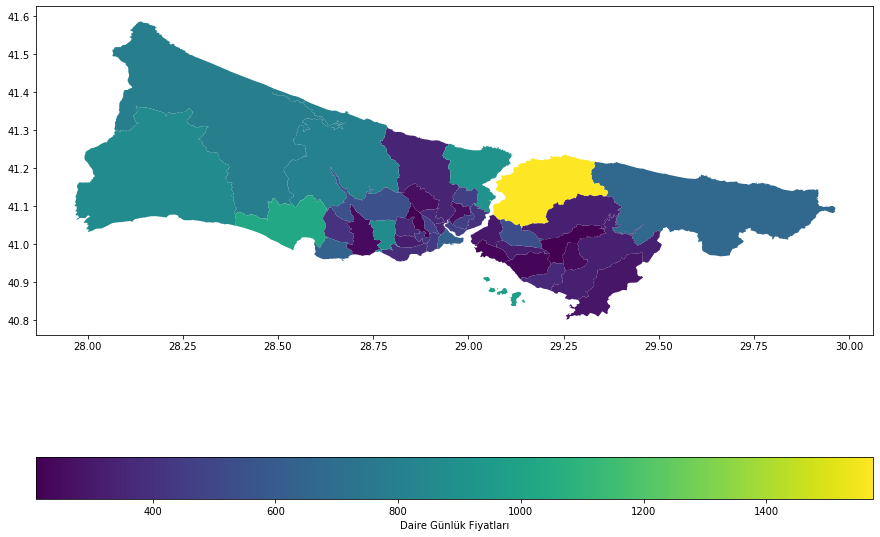

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ist_ilce_birles.plot(column='price', ax=ax, legend=True, legend_kwds={'label': "Daire Günlük Fiyatları",'orientation': "horizontal"})

In [106]:
ist_secilmis = ist_ilce_birles[(ist_ilce_birles['price']< 200)]

In [102]:
ist_secilmis.head()

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right,toplam
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",3.154204e+07,1.678473e+08,NaN,41.099640,28.925797,344.800847,10.555085,2.262712,0.502125,1.957627,213.330508,2.0,1
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41...",3.242240e+07,1.878778e+08,NaN,41.081823,28.989754,263.253106,4.908385,1.335404,0.294104,6.627329,231.145963,6.0,1
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41...",3.341783e+07,2.064985e+08,NaN,41.026142,28.660826,406.844961,8.973643,1.288372,0.415327,3.179845,239.655814,8.0,1
10,Avcilar,None,"MULTIPOLYGON (((28.75491 40.97986, 28.75335 40...",3.369492e+07,2.079865e+08,NaN,40.998555,28.717604,252.000000,3.653659,1.463415,0.430000,2.165854,220.756098,10.0,1
11,Bahcelievler,None,"MULTIPOLYGON (((28.88304 41.00156, 28.87729 40...",3.001579e+07,1.802886e+08,NaN,41.000883,28.842405,316.473684,4.903509,2.807018,0.452809,2.438596,211.692982,11.0,1


C:\Users\uzayuzal\Anaconda3\lib\site-packages\geopandas\plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


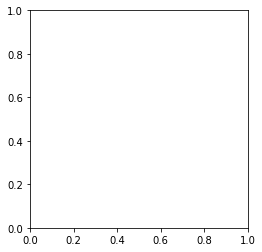

In [107]:
ist_secilmis.plot()